In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi

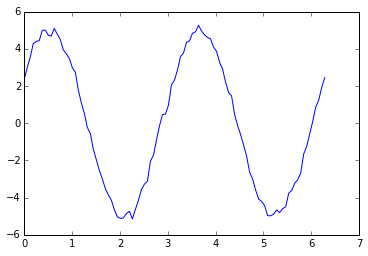

In [2]:
%matplotlib inline

####################################################################################################

def g(x, k, phi):                  #Signal
    return (np.sin(k*x + phi))

####################################################################################################

x = np.linspace(0, 2*pi, 101)
k = 2.     #Fitting parameter
phi = pi/6.     #Fitting Paramter
err_floor = 0.1
meas_err = np.cos(x)*0.2
var = err_floor**2 + meas_err**2
unc = sqrt(var)
y = 5*g(x, k, phi) + np.random.randn(x.shape[0])*unc     #Signal with noise added with a 5:1 Signal-to-Noise ratio

# print(meas_err, err_floor, var, unc)

coeffs, cov = curve_fit(g, x, y, p0 = [k, phi])
k_best = coeffs[0]
phi_best = coeffs[1]

plt.figure()
plt.plot(x, y)
plt.show()

####################################################################################################



In [10]:
%matplotlib inline

# def y_poly(x, *args):
#     y_model = ''
#     i = 0
#     for arg in args:
#         y_model.append(str(arg*x**i))
#         i += 1
#     return eval(y_model)
def y_poly(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    y_model = c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5 + c6*x**6 + c7*x**7 + c8*x**8
    return y_model

# x1 = np.linspace(0, 2*pi, len(y))     #Should I be using a new x assuming I was given unknown data, or old x from above?
coeffs1, cov1 = curve_fit(y_poly, x, y)
best_fit = np.array([i for i in coeffs1])

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})     #Formats print statement correctly using lambda function
print("Best-fit polynomial coefficients: {}".format(best_fit))
print("The covariance matrix: \n {}".format(cov1))

print(np.max(cov1), np.min(cov1))

Best-fit polynomial coefficients: [3.030 -0.826 30.026 -56.833 38.008 -12.153 2.014 -0.166 0.005]
The covariance matrix: 
 [[0.039 -0.243 0.493 -0.467 0.240 -0.071 0.012 -0.001 0.000]
 [-0.243 2.285 -5.401 5.565 -3.013 0.922 -0.161 0.015 -0.001]
 [0.493 -5.401 13.767 -14.854 8.299 -2.599 0.460 -0.043 0.002]
 [-0.467 5.565 -14.854 16.528 -9.441 3.006 -0.539 0.051 -0.002]
 [0.240 -3.013 8.299 -9.441 5.483 -1.769 0.321 -0.031 0.001]
 [-0.071 0.922 -2.599 3.006 -1.769 0.577 -0.105 0.010 -0.000]
 [0.012 -0.161 0.460 -0.539 0.321 -0.105 0.019 -0.002 0.000]
 [-0.001 0.015 -0.043 0.051 -0.031 0.010 -0.002 0.000 -0.000]
 [0.000 -0.001 0.002 -0.002 0.001 -0.000 0.000 -0.000 0.000]]
(16.527770332611805, -14.854290439206713)


In [1]:
from scipy.optimize import curve_fit

def g(x, k, phi):
    return np.sin(k*x + phi)

coeffs, cov = curve_fit(g, x, y, p0 = [2, pi/6])

# coeffs gives the best-fit m and b.
k_best = coeffs[0]
phi_best = coeffs[1]
print('Best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_best, phi_best))

# The diagonal elements of the covariance matrix are the variances of the two fitting parameters.
k_sig = np.sqrt(cov[0, 0])
phi_sig = np.sqrt(cov[1, 1])
print('1 sigma error on best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_sig,phi_sig))

print('The coeffs array:\n', coeffs)
print('And the covariance matrix:\n', cov)
plt.errorbar(x, y, yerr = err, fmt = 'x')
plt.plot(x, g(x, k_best, phi_best ))
plt.plot(x, y, '.')


import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

k_start, k_end = k_best-5*k_sig, k_best+5*k_sig
phi_start, phi_end = phi_best-5*phi_sig, phi_best+5*phi_sig
xx, yy = np.mgrid[k_start:k_end:0.001, phi_start:phi_end:0.001]
print(xx.min(),xx.max(), yy.min(), yy.max())
# Create a grid of 2d coordinates 
xy = np.dstack((xx, yy))

# create a 2d Gaussian according to the best-fit (m, b) and the covariance matrix.
gauss2d = multivariate_normal(coeffs, cov)
# find probability
P = gauss2d.pdf(xy)
# calculate CDF
CDF_cf = compute_cdf(P)
extent = [k_start, k_end, phi_start, phi_end ]
# plotting
plt.figure()
plt.contour(CDF_cf.T, extent = extent, levels = contour_levels, linestyles=['--', '--', '--'], exten)
plt.scatter(coeffs[0], coeffs[1], marker = 'x', facecolor = 'r', s = 100)
plt.show()

SyntaxError: non-keyword arg after keyword arg (<ipython-input-1-14b5bd33bb16>, line 45)